In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.dates import DateFormatter

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel ('monthly export amount2.xlsx')
df

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,155
0,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,155
1,2007-01-01 00:00:00,2007-02-01 00:00:00,2007-03-01 00:00:00,2007-04-01 00:00:00,2007-05-01 00:00:00,2007-06-01 00:00:00,2007-07-01 00:00:00,2007-08-01 00:00:00,2007-09-01 00:00:00,2007-10-01 00:00:00,...,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00
2,38223018,35866026,41532719,39443013,39852981,39387232,35048576,37669038,35534156,37291389,...,51935479,49858132,55511984,51068508,48912380,49320631,49234963,50888374,47479186,49775699


Because the data frame had 3 rows and 156 columns, it should be transposed to 3 columns which one of them is date and the other amounts, also one column as an ID.

In [3]:
df =df.transpose()


In [4]:
df.columns = ['ID','Datetime','Total']
df

,ID,Datetime,Total
0,0,2007-01-01,38223018
1,1,2007-02-01,35866026
2,2,2007-03-01,41532719
3,3,2007-04-01,39443013
4,4,2007-05-01,39852981
...,...,...,...
151,151,2019-08-01,49320631
152,152,2019-09-01,49234963
153,153,2019-10-01,50888374
154,154,2019-11-01,47479186


In [5]:
df['ID'] = df['ID'].astype(np.float64)

df['Total'] = df['Total'].astype(np.float64)

Then split the test and train parts, which 2019 is the test and the previous 12 years are train.

In [6]:
import math
total_size=len(df)
split = 144 / 156
train_size=math.floor(split*total_size)
train=df.head(train_size)
test=df.tail(len(df) -train_size)

The Holt-Winters forecasting algorithm allows users to smooth a time series and use that data to forecast areas of interest. Exponential smoothing assigns exponentially decreasing weights and values against historical data to decrease the value of the weight for the older data. In other words, more recent historical data is assigned more weight in forecasting than the older results.

Single Exponential Smoothing – suitable for forecasting data with no trend or seasonal pattern, where the level of the data may change over time.


In [11]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# Create prediction table
y_hat = test.copy()
fit2 = ExponentialSmoothing(np.asarray(train['Total'])).fit(smoothing_level=0.1,optimized=False)
y_hat['SES'] = fit2.forecast(len(test))

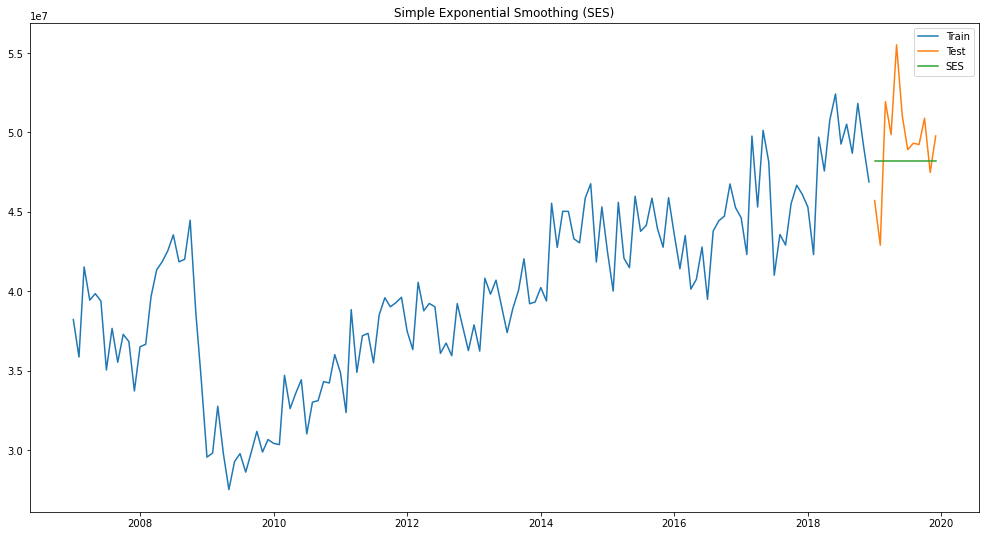

In [13]:
#Plotting data
plt.figure(figsize=(17,9))
plt.plot(train['Datetime'], train['Total'], label='Train')
plt.plot(test['Datetime'],test['Total'], label='Test')
plt.plot(y_hat['Datetime'],y_hat['SES'], label='SES')
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing (SES)")
plt.show()


Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results. 

Because in this dataframe, all the data points are amounts in billion, so the RMSE is shown a big amount. So, it's better to divide it to 10000000 to change in range 0~1.

In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Total, y_hat.SES))/10000000
print('RMSE = '+str(rms))

RMSE = 0.3239504081715602


The same calculation to the import data.

In [18]:
df2 = pd.read_excel ('monthly import amount2.xlsx')

In [19]:
df2 =df2.transpose()
df2.columns = ['ID','Datetime','Total']
df2

,ID,Datetime,Total
0,0,2007-01-01,32224562
1,1,2007-02-01,32242267
2,2,2007-03-01,37580303
3,3,2007-04-01,34869515
4,4,2007-05-01,35548764
...,...,...,...
151,151,2019-08-01,51815887
152,152,2019-09-01,49366806
153,153,2019-10-01,51827652
154,154,2019-11-01,47939304


In [17]:
df2['ID'] = df2['ID'].astype(np.float64)

df2['Total'] = df2['Total'].astype(np.float64)

In [20]:
total_size2=len(df)
split = 144 / 156
train_size2 = math.floor(split*total_size2)
train2 = df2.head(train_size2)
test2 = df2.tail(len(df2) -train_size2)

In [21]:
y_hat2 = test2.copy()
fit2 = ExponentialSmoothing(np.asarray(train2['Total'])).fit(smoothing_level=0.1,optimized=False)
y_hat2['SES'] = fit2.forecast(len(test2))

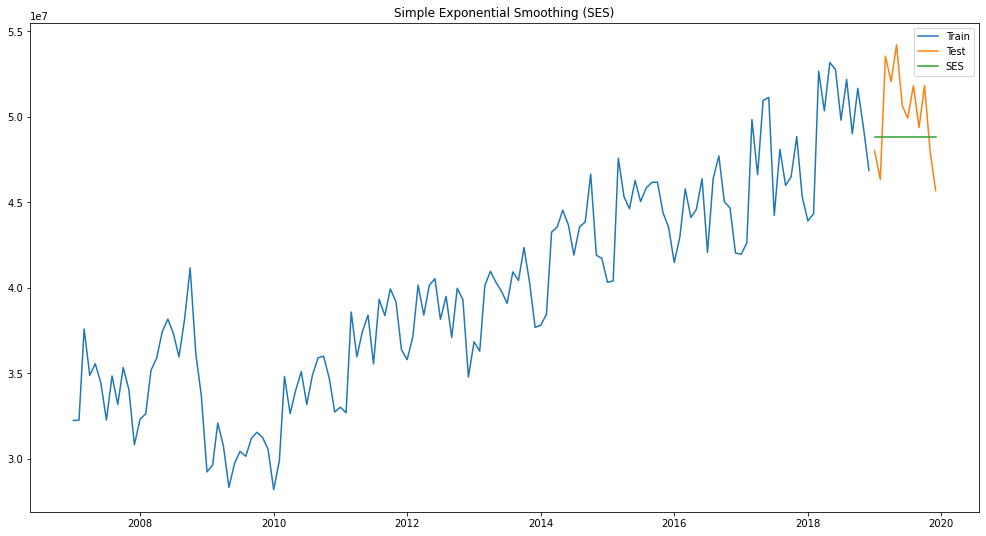

In [23]:
plt.figure(figsize=(17,9))
plt.plot(train2['Datetime'], train2['Total'], label='Train')
plt.plot(test2['Datetime'],test2['Total'], label='Test')
plt.plot(y_hat2['Datetime'],y_hat2['SES'], label='SES')
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing (SES)")
plt.show()

In [24]:
rms2 = sqrt(mean_squared_error(test2.Total, y_hat2.SES))/10000000
print('RMSE = '+str(rms2))

RMSE = 0.2936090673668883
